In [2]:
!pip install --quiet matplotlib seaborn pandas scikit-learn

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Aprendizado de máquina supervisionado para classificação

alguen tem que dar informacão para ela poder classifcar
alguém vai supervisionar enquanto ela aprende
parece o testa de captcha do googla 
classificar é separar os dados en categorias
manipulamos (organizamos) dados para a máquina aprender 
olocamos os dados na máquina limpamos e separamos os dados (pré-classificanos)
a máquina aprende identificando padrões de forma autonoma con at supervisões

> O machine learning (ML) é a tarefa de receber uma entrada $\mathbf{x}$ e a 
saída correta $\mathbf{y}$ (supervisão) e tem que construir uma função $f$ que 
mapeia $\mathbf{X} \rightarrow \mathbf{y}$. No futuro podemos usar $f$ para 
estimar a resposta de novas entradas $\mathbf{\hat{y}}$.

In [3]:
df = pd.read_csv("Blood_samples_dataset_balanced_MODIFICADO.csv")
df.sample(5)

,Unnamed: 0,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1698,1698,0.797116,0.997107,1.248757,0.312816,0.278493,0.235706,0.340712,0.821870,0.772825,...,0.268153,1.035427,1.062819,0.584386,1.044194,0.251841,0.452540,0.623956,0.753229,Diabetes
1012,1012,0.759007,0.939945,0.687906,1.025997,0.358204,0.911895,1.057264,0.279439,0.259181,...,0.441146,0.418996,1.024746,1.062123,0.424847,0.304212,0.706171,1.006086,0.726538,Healthy
1905,1905,1.075024,0.748929,1.085198,1.057526,0.716684,0.480141,0.157413,0.714616,0.373038,...,0.206498,0.526041,0.407845,0.394832,0.519167,0.407221,0.404523,0.648651,0.911542,Anemia
262,262,0.337783,0.413391,0.973590,0.544146,0.065897,1.123771,0.404803,0.701834,0.917038,...,1.043960,1.063088,0.584910,0.654917,0.155900,0.697530,0.706987,0.456994,0.254017,Diabetes
1887,1887,0.985893,0.768849,1.028291,1.062865,0.646576,0.329557,0.205055,0.612287,0.383755,...,0.254477,0.625888,0.455474,0.278780,0.382420,0.685960,0.248251,0.565671,0.845522,Anemia


In [4]:
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
1455,0.826294,0.865144,0.757727,1.070283,0.944986,0.755879,0.559481,0.788531,0.076599,0.825854,...,0.690136,0.318153,0.584298,0.346584,0.648046,1.190042,0.096939,0.690253,1.008191,Healthy
1810,0.990206,0.569055,0.622241,0.900705,0.354177,0.927522,0.733265,0.254060,0.451572,0.463605,...,0.523258,0.269189,1.123657,0.998703,0.585343,0.687378,0.146403,0.177107,0.108156,Healthy
577,0.831449,1.045301,0.550918,0.444793,1.000043,0.845119,0.821974,0.442117,0.360190,0.285103,...,0.192914,1.017511,0.624060,1.001472,1.268542,0.737934,0.643726,0.149951,0.258189,Diabetes
639,0.794943,0.352360,0.329684,0.683954,0.390202,0.326641,0.078544,0.325543,0.213578,0.824843,...,0.861878,0.328701,0.510994,0.160167,0.938532,1.175152,0.901300,0.803672,0.762984,Anemia
47,0.337062,0.893829,1.066572,0.951906,0.483693,0.603559,1.033218,0.465709,0.523949,0.905826,...,0.514046,0.296856,0.483083,0.092734,0.575091,1.038845,0.183662,1.082303,0.283705,Thalasse


Glucose
Cholesterol
Hemoglobin
Platelets
White Blood Cells
Red Blood Cells
Hematocrit
Mean Corpuscular Volume
Mean Corpuscular Hemoglobin
Mean Corpuscular Hemoglobin Concentration
Insulin
BMI
Systolic Blood Pressure
Diastolic Blood Pressure
Triglycerides
HbA1c
LDL Cholesterol
HDL Cholesterol
ALT
AST
Heart Rate
Creatinine


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


Troponin
C-reactive Protein
Disease


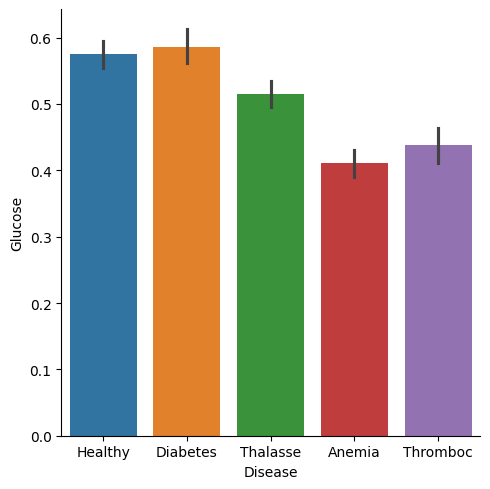

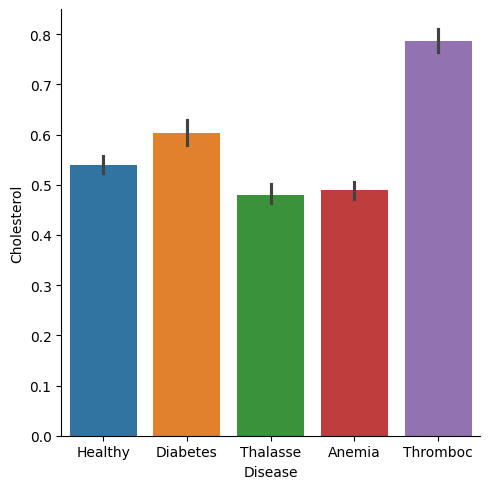

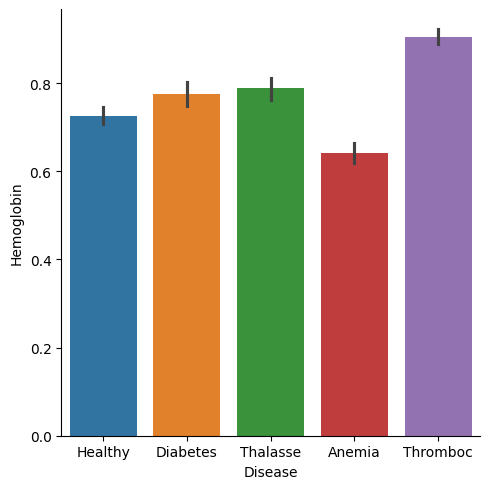

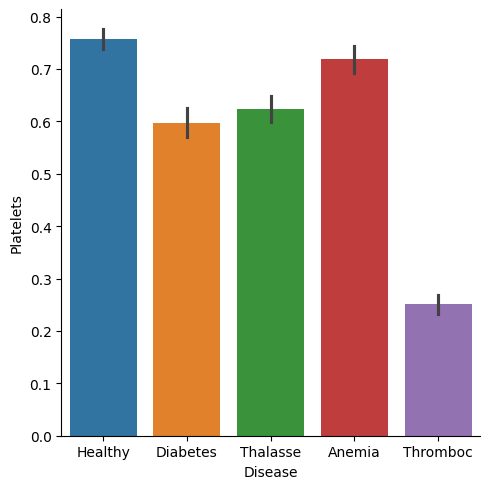

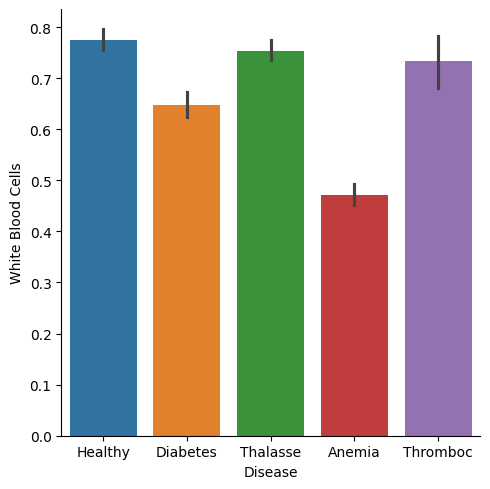

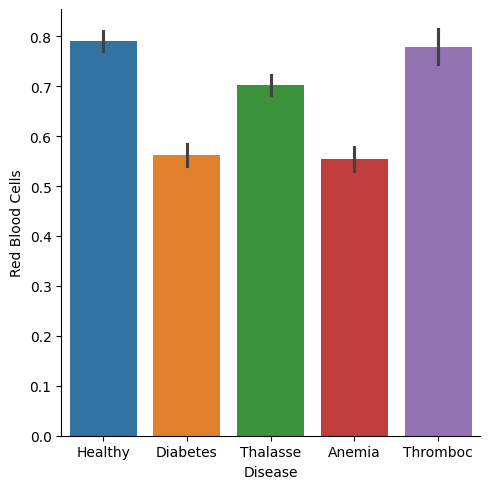

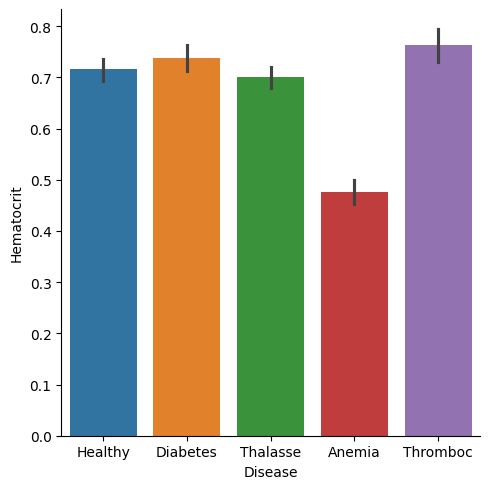

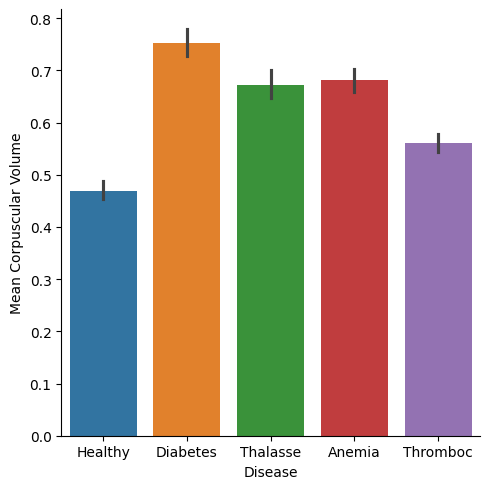

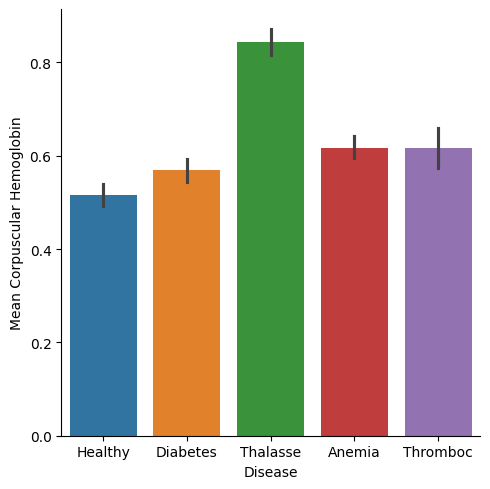

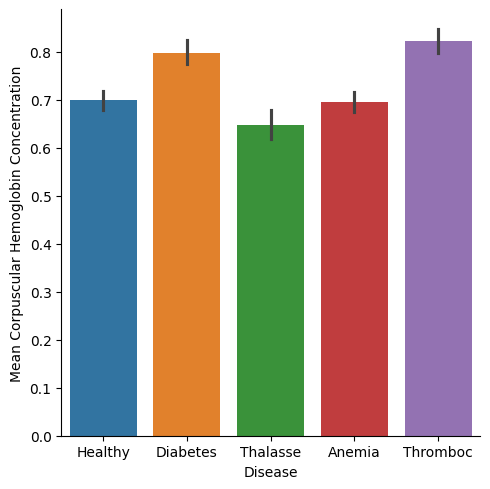

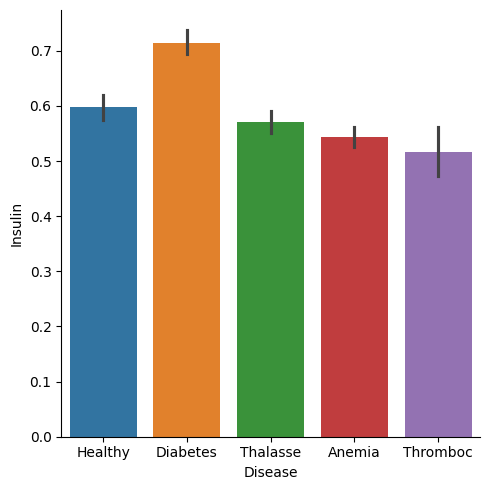

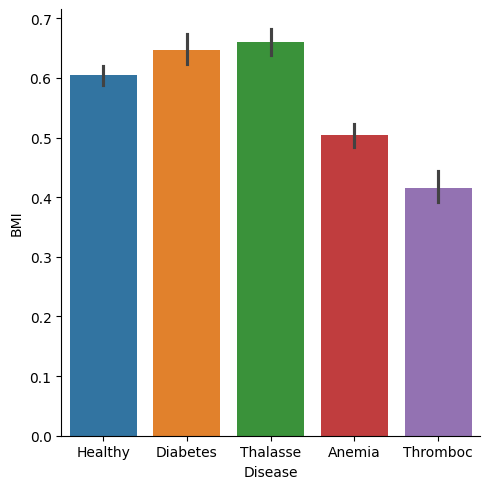

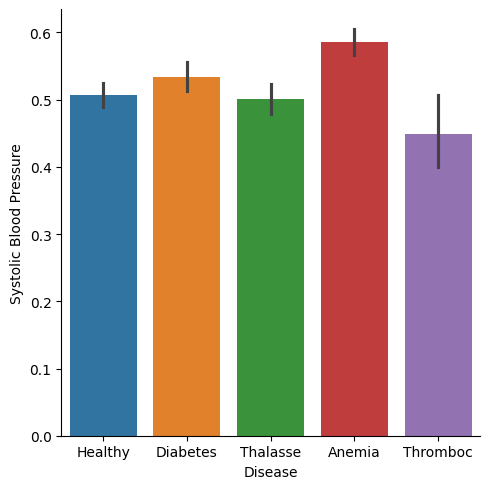

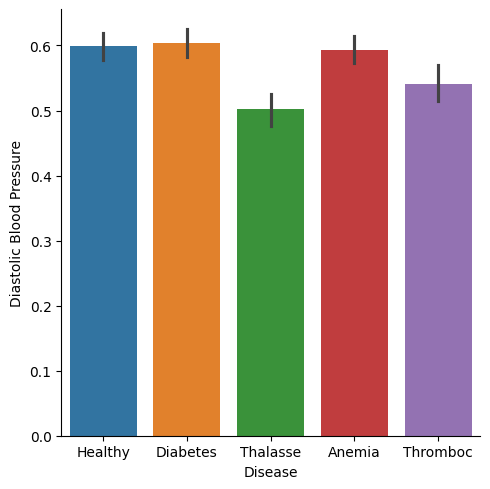

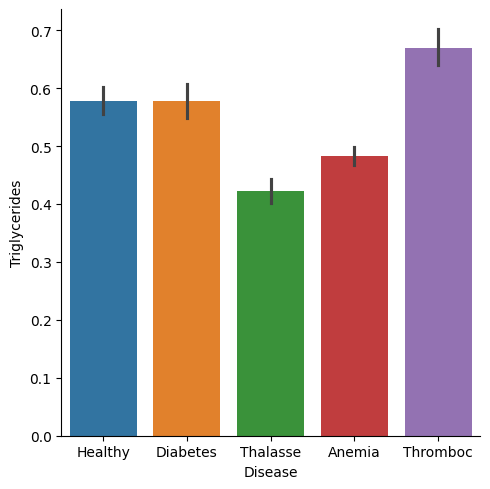

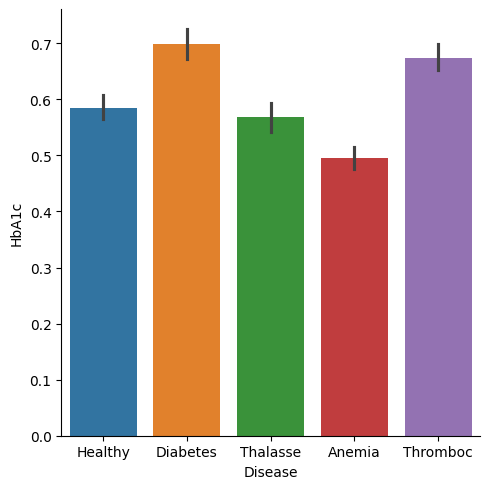

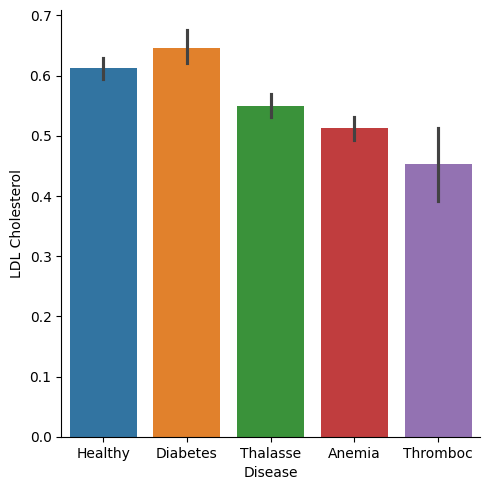

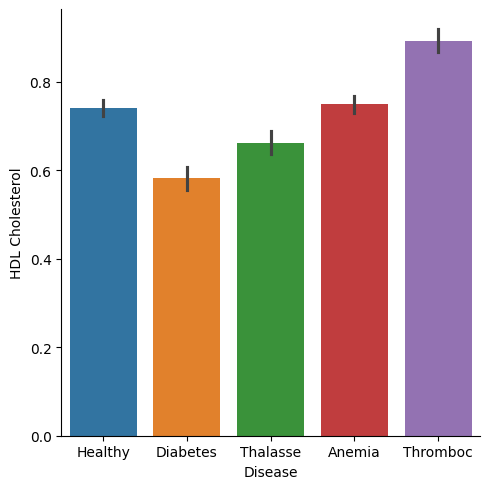

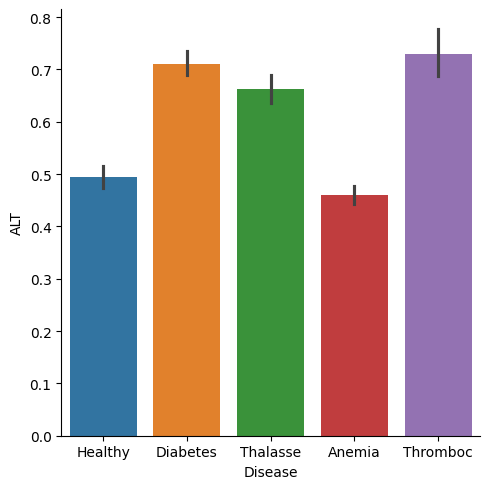

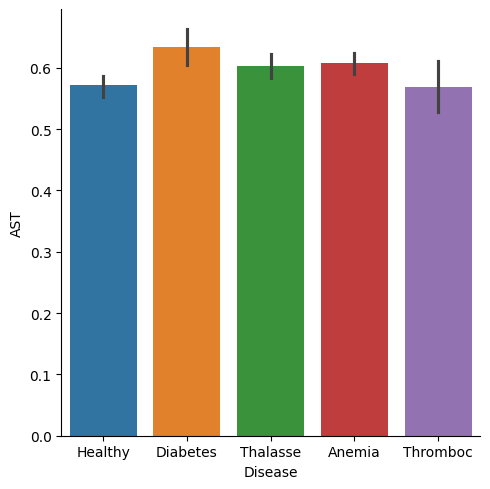

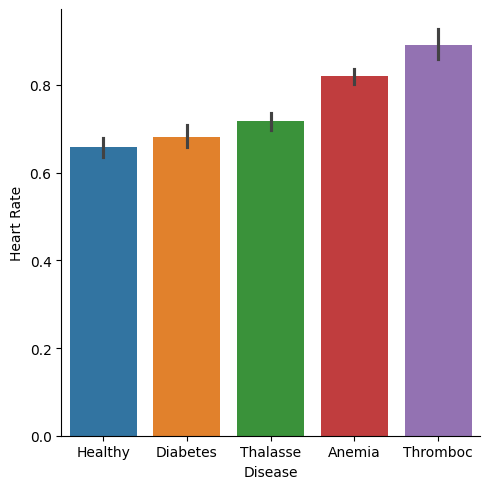

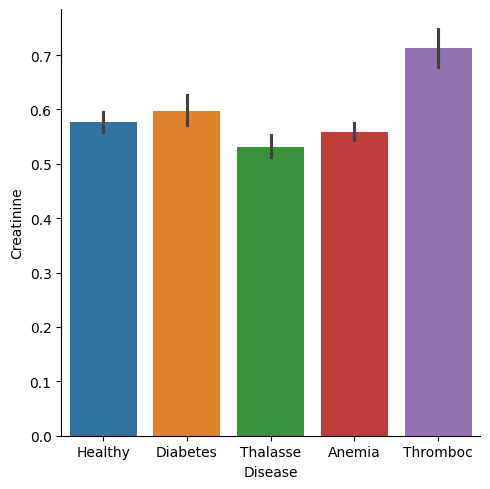

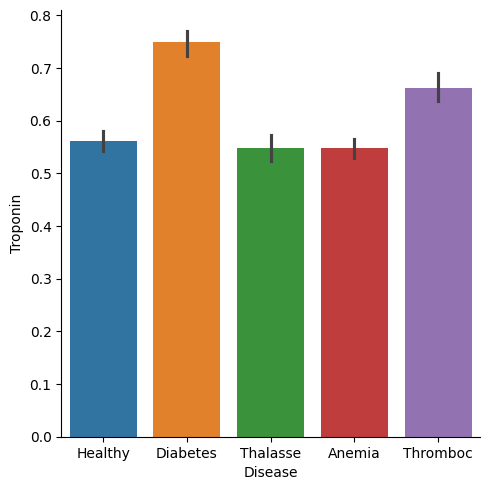

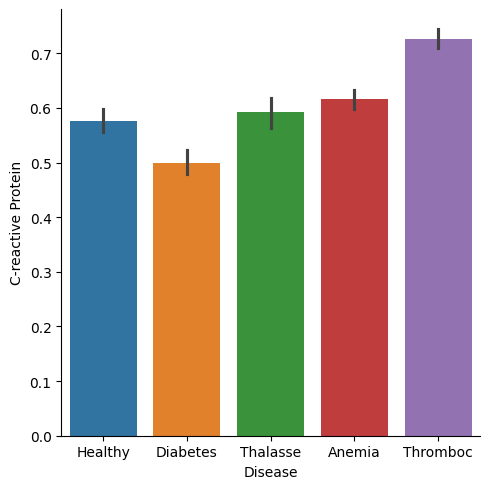

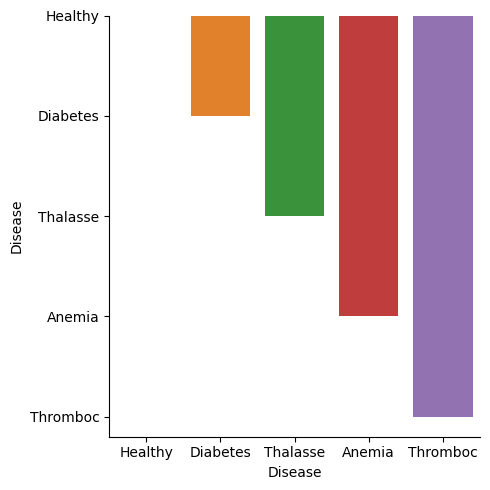

In [5]:
#sh*t in,  sh*t out

for coluna in df.columns:
    print(coluna)
    sns.catplot(data=df, x="Disease", y=coluna, kind="bar", hue="Disease")
    plt.show

In [6]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [7]:
X = df.drop("Disease", axis=1)
y = df["Disease"]

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [11]:
deyckson = DecisionTreeClassifier()
deyckson.fit(X, y)

DecisionTreeClassifier()

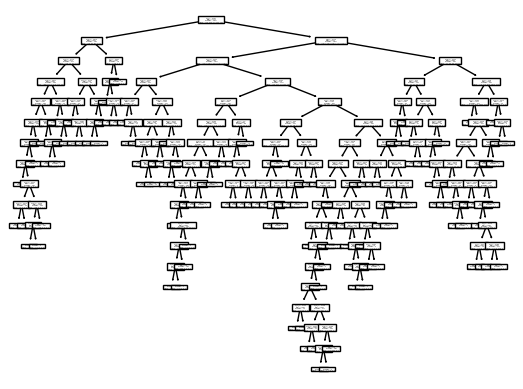

In [12]:
plot_tree(deyckson);

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
pac_aleatorio = X.sample(random_state=42)
pac_aleatorio

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
2236,0.166203,0.715004,0.718211,1.038445,0.791181,0.818299,0.262325,1.033515,0.396963,0.057835,...,0.388513,0.747181,0.177936,1.113619,0.617529,0.866632,0.654956,0.366683,0.819282,0.35259


In [28]:
deyckson.predict(pac_aleatorio)

array(['Anemia'], dtype=object)

In [16]:
y.iloc[2236]

'Anemia'

In [29]:
from sklearn.metrics import accuracy_score

y_pred = deyckson.predict(X)
accuracy_score(y, y_pred)

1.0

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [19]:
deycksonv2 = DecisionTreeClassifier()
deycksonv2.fit(X_train, y_train)
deycksonv2

DecisionTreeClassifier()

In [30]:
print(accuracy_score(y_train, deycksonv2.predict(X_train)))
print(accuracy_score(y_test, deycksonv2.predict(X_test)))

1.0
0.8969072164948454


# Aprendizado de náquina supervisionado para classificação

alguen tem que dar informacão para ela poder classifcar
alguém vai supervisionar enquanto ela aprende
parece o testa de captcha do googla 
classificar é separar os dados en categorias
manipulamos (organizamos) dados para a máquina aprender 
olocamos os dados na máquina limpamos e separamos os dados (pré-classificanos)
a máquina aprende identificando padrões de forma autonoma con at supervisões

> O machine learning (ML) é a tarefa de receber uma entrada $\mathbf{x}$ e a 
saída correta $\mathbf{y}$ (supervisão) e tem que construir uma função $f$ que 
mapeia $\mathbf{X} \rightarrow \mathbf{y}$. No futuro podemos usar $f$ para 
estimar a resposta de novas entradas $\mathbf{\hat{y}}$.

In [21]:
df = df.drop("Unnamed: 0", axis=1)
df.sample(5)

KeyError: "['Unnamed: 0'] not found in axis"

In [22]:
df.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

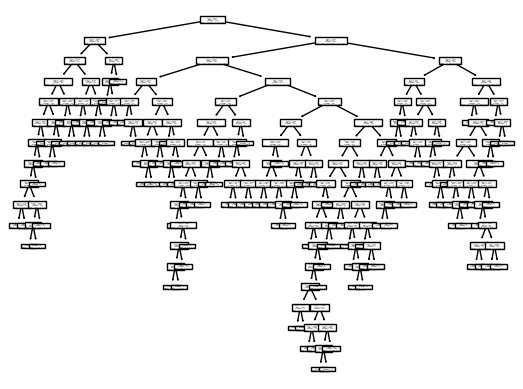

In [34]:
plot_tree(deyckson);

In [24]:
pac_aleatorio = X.sample(random_state=42)
pac_aleatorio

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
2236,0.166203,0.715004,0.718211,1.038445,0.791181,0.818299,0.262325,1.033515,0.396963,0.057835,...,0.388513,0.747181,0.177936,1.113619,0.617529,0.866632,0.654956,0.366683,0.819282,0.35259


In [25]:
y.iloc[2236]

'Anemia'

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [27]:
print(accuracy_score(y_train, deycksonv2.predict(X_train)))
print(accuracy_score(y_test, deycksonv2.predict(X_test)))

1.0
0.8969072164948454
